# Recolección de datos electorales en Ecuador año 2013

Empezamos recolectando la información de las elecciones correspondientes al año 2013 de la página oficial del [CNE](http://cne.gob.ec/es/estadisticas/bases-de-datos)

Nos dirigimos a la carpeta de elecciones generales del año 2009, y recopilamos la información necesaria. Una vez descargados los archivos y exportados en formato csv, procedemos a subirlos a nuestro notebook.

In [1]:
import pandas as pd
import os
import matplotlib as mp 
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"C:\Users\HP\Documents\GitHub\Proyecto_Datos_Elecciones_Ecuador_2002_2017\2013")
df_c2013=pd.read_csv('C2013.csv')

In [3]:
df_c2013=df_c2013.drop(['CANDIDATO_CIRCUNSCRIPCION_CODIGO','DIGNIDAD_CODIGO','CANDIDATO_ORDEN','CANDIDATO_PROVINCIA_CODIGO','CANDIDATO_CANTON_CODIGO','CANDIDATO_PARROQUIA_CODIGO'], axis=1)
df_c2013=df_c2013.drop(['CANDIDATO_SEXO','CANDIDATO_EDAD_EXACTA','CANDIDATO_GRUPOS_DE_EDAD','SUPLENTE_NOMBRE.1','SUPLENTE_SEXO.1','SUPLENTE_EDAD_EXACTA.1'], axis=1)
df_c2013=df_c2013.drop(['SUPLENTE_GRUPOS_DE_EDAD.1','SUPLENTE_NOMBRE.2','SUPLENTE_SEXO.2','SUPLENTE_EDAD_EXACTA.2','SUPLENTE_GRUPOS_DE_EDAD.2'], axis=1)
df_c2013.head()

,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_NOMBRE
0,9,1000001,NOBOA PONTON ALVARO FERNANDO
1,3,1000002,CORREA DELGADO RAFAEL VICENTE
2,12,1000003,WRAY REYES NORMAN STEF
3,7,1000004,ACOSTA ESPINOSA ALBERTO JOSE
4,4,1000005,GUTIERREZ BORBUA LUCIO EDWIN


In [4]:
df_R2013=pd.read_csv('R2013.csv')
df_R2013=df_R2013.drop(['CIRCUNSCRIPCION_CODIGO','SEXO','CANDIDATO_ESTADO','DIGNIDAD_CODIGO'], axis=1)
df_R2013.head()

,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_VOTOS
0,1,260,285,33,96,380,9,1000001,185
1,1,260,285,33,96,380,8,1000006,1098
2,1,260,285,33,96,380,1,1000007,40
3,1,260,285,33,96,380,3,1000002,3963
4,1,260,285,33,96,380,4,1000005,389


In [5]:
df_R2013=df_R2013.astype('int32')
df_R2013.dtypes

PROVINCIA_CODIGO    int32
CANTON_CODIGO       int32
PARROQUIA_CODIGO    int32
NUMERO_DE_ACTAS     int32
VOTOS_EN_BLANCO     int32
VOTOS_NULOS         int32
OP_CODIGO           int32
CANDIDATO_CODIGO    int32
CANDIDATO_VOTOS     int32
dtype: object

In [11]:
df_p2013=pd.read_csv('p2013.csv')
df_p2013=df_p2013.drop(['PARROQUIA_ESTADO'], axis=1)
df_p2013.head()

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE,CANTON_CODIGO,CANTON_NOMBRE,PARROQUIA_CODIGO,PARROQUIA_NOMBRE
0,7,EL ORO,360,ZARUMA,5,ABANIN
1,13,MANABI,440,PORTOVIEJO,10,ABDON CALDERON
2,1,AZUAY,285,SANTA ISABEL,15,ABDON CALDERON / LA UNION
3,6,CHIMBORAZO,215,ALAUSI,20,ACHUPALLAS
4,15,NAPO,620,TENA,25,AHUANO


Investigamos la existencia de datos duplicados.

In [12]:
df_R2013.count()

PROVINCIA_CODIGO    664190
CANTON_CODIGO       664190
PARROQUIA_CODIGO    664190
NUMERO_DE_ACTAS     664190
VOTOS_EN_BLANCO     664190
VOTOS_NULOS         664190
OP_CODIGO           664190
CANDIDATO_CODIGO    664190
CANDIDATO_VOTOS     664190
dtype: int64

No existen datos duplicados, por lo que continuamos filtrando opciones. Revisamos si existen datos nulos. 

In [13]:
print(df_R2013.isnull().sum())

PROVINCIA_CODIGO    0
CANTON_CODIGO       0
PARROQUIA_CODIGO    0
NUMERO_DE_ACTAS     0
VOTOS_EN_BLANCO     0
VOTOS_NULOS         0
OP_CODIGO           0
CANDIDATO_CODIGO    0
CANDIDATO_VOTOS     0
dtype: int64


Tampoco existen filas con datos nulos. 

## Agrupación de datos por candidato

Antes de contar votos por candidato, procedemos a unir las tablas necesarias. Para eliminar inconsistencias de la columna de candidatos, cambiamos el nombre de la columna codigo candidato. Comenzamos uniendo las tablas correspondientes

In [14]:
df_c2013.rename(columns={'CANDIDATO_CODIGO':'CODIGO'}, inplace=True)
df_c2013=df_c2013.head(8)
df_c2013

,OP_CODIGO,CODIGO,CANDIDATO_NOMBRE
0,9,1000001,NOBOA PONTON ALVARO FERNANDO
1,3,1000002,CORREA DELGADO RAFAEL VICENTE
2,12,1000003,WRAY REYES NORMAN STEF
3,7,1000004,ACOSTA ESPINOSA ALBERTO JOSE
4,4,1000005,GUTIERREZ BORBUA LUCIO EDWIN
5,8,1000006,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
6,1,1000007,ZAVALA AVELLAN NELSON MARTIN
7,13,1000008,RODAS ESPINEL MAURICIO ESTEBAN


Unimos las tablas de candidatos y la de resultados.

In [15]:
df_rp=pd.merge(left=df_R2013, right=df_c2013, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_rp.head()

,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE
0,1,260,285,33,96,380,9,1000001,185,9.0,1000001.0,NOBOA PONTON ALVARO FERNANDO
1,1,260,285,33,96,380,8,1000006,1098,8.0,1000006.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
2,1,260,285,33,96,380,1,1000007,40,1.0,1000007.0,ZAVALA AVELLAN NELSON MARTIN
3,1,260,285,33,96,380,3,1000002,3963,3.0,1000002.0,CORREA DELGADO RAFAEL VICENTE
4,1,260,285,33,96,380,4,1000005,389,4.0,1000005.0,GUTIERREZ BORBUA LUCIO EDWIN


In [16]:
df_rp=df_rp.groupby('CANDIDATO_NOMBRE')['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_rp

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_VOTOS
CANDIDATO_NOMBRE,,,
ACOSTA ESPINOSA ALBERTO JOSE,179230,684027,280539
CORREA DELGADO RAFAEL VICENTE,179213,683951,4918482
GUTIERREZ BORBUA LUCIO EDWIN,179230,684027,578875
LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,179230,684027,1951102
NOBOA PONTON ALVARO FERNANDO,179230,684027,319956
RODAS ESPINEL MAURICIO ESTEBAN,179223,684002,335532
WRAY REYES NORMAN STEF,179176,683831,112525
ZAVALA AVELLAN NELSON MARTIN,179230,684027,105592


Realizamos un gráfico de pastel para poder visibilizar mejor la información.

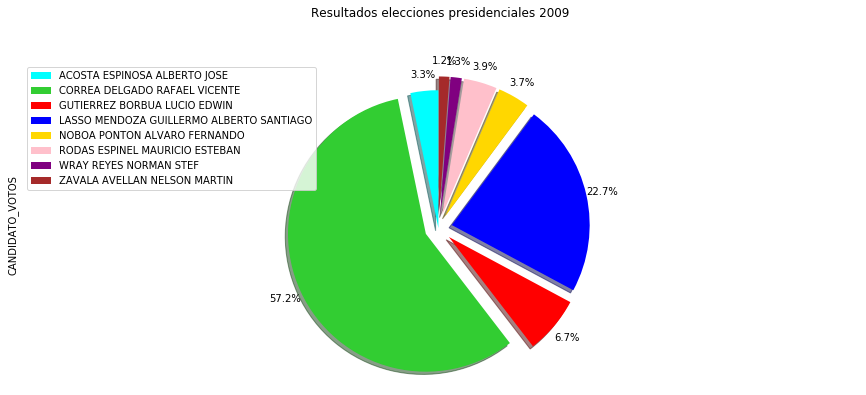

In [17]:
Colores= ['cyan','limegreen','red','blue','gold','pink','purple','brown']
explode_list = [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

df_rp['CANDIDATO_VOTOS'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            colors=Colores,
                            pctdistance=1.12,
                            explode=explode_list
                            )

# Título del gráfico
plt.title('Resultados elecciones presidenciales 2009', y=1.12) 

plt.axis('equal') 

# Añadir leyenda
plt.legend(labels=df_rp.index, loc='upper left') 

plt.show()

In [17]:
df_rp.to_excel('Resultados 2013.xlsx', sheet_name='Hoja1')
print('Exportación exitosa')

Exportación exitosa


In [18]:
del df_rp

## Agrupación de datos por provincia

Procedemos nuevamente a unir las tablas correspondientes para poder aislar los datos que necesitamos.

In [19]:
df_p=pd.merge(left=df_R2013, right=df_c2013, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_p.head()

,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE
0,1,260,285,33,96,380,9,1000001,185,9.0,1000001.0,NOBOA PONTON ALVARO FERNANDO
1,1,260,285,33,96,380,8,1000006,1098,8.0,1000006.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
2,1,260,285,33,96,380,1,1000007,40,1.0,1000007.0,ZAVALA AVELLAN NELSON MARTIN
3,1,260,285,33,96,380,3,1000002,3963,3.0,1000002.0,CORREA DELGADO RAFAEL VICENTE
4,1,260,285,33,96,380,4,1000005,389,4.0,1000005.0,GUTIERREZ BORBUA LUCIO EDWIN


In [20]:
df_prov=df_p2013.drop(['CANTON_CODIGO','CANTON_NOMBRE','PARROQUIA_CODIGO','PARROQUIA_NOMBRE'], axis=1)
df_prov.head()

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE
0,7,EL ORO
1,13,MANABI
2,1,AZUAY
3,6,CHIMBORAZO
4,15,NAPO


In [21]:
df_p=df_p.drop(['NUMERO_DE_ACTAS'], axis=1)

In [22]:
df_p=pd.merge(left=df_p, right=df_prov, how='left', left_on='PROVINCIA_CODIGO', right_on='PROVINCIA_CODIGO')
df_p.head()

,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE,PROVINCIA_NOMBRE
0,1,260,285,96,380,9,1000001,185,9.0,1000001.0,NOBOA PONTON ALVARO FERNANDO,AZUAY
1,1,260,285,96,380,9,1000001,185,9.0,1000001.0,NOBOA PONTON ALVARO FERNANDO,AZUAY
2,1,260,285,96,380,9,1000001,185,9.0,1000001.0,NOBOA PONTON ALVARO FERNANDO,AZUAY
3,1,260,285,96,380,9,1000001,185,9.0,1000001.0,NOBOA PONTON ALVARO FERNANDO,AZUAY
4,1,260,285,96,380,9,1000001,185,9.0,1000001.0,NOBOA PONTON ALVARO FERNANDO,AZUAY


In [23]:
df_prov1=df_p.groupby(['PROVINCIA_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_prov1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  \
PROVINCIA_NOMBRE                  CANDIDATO_NOMBRE                                            
AMERICA LATINA EL CARIBE Y AFRICA ACOSTA ESPINOSA ALBERTO JOSE                         3078   
                                  CORREA DELGADO RAFAEL VICENTE                        3078   
                                  GUTIERREZ BORBUA LUCIO EDWIN                         3078   
                                  LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO             3078   
                                  NOBOA PONTON ALVARO FERNANDO                         3078   
...                                                                                     ...   
ZAMORA CHINCHIPE                  LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            37278   
                                  NOBOA PONTON ALVARO FERNANDO                        37278   
                                  RODAS ESPINEL MAURICIO ESTEBAN                      37278   
                                  WRAY REYES NORMAN STEF                              37278   
                                  ZAVALA AVELLAN NELSON MARTIN                        37278   

                                                                            VOTOS_NULOS  \
PROVINCIA_NOMBRE                  CANDIDATO_NOMBRE                                        
AMERICA LATINA EL CARIBE Y AFRICA ACOSTA ESPINOSA ALBERTO JOSE                    20655   
                                  CORREA DELGADO RAFAEL VICENTE                   20655   
                                  GUTIERREZ BORBUA LUCIO EDWIN                    20655   
                                  LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO        20655   
                                  NOBOA PONTON ALVARO FERNANDO                    20655   
...                                                                                 ...   
ZAMORA CHINCHIPE                  LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO       107046   
                                  NOBOA PONTON ALVARO FERNANDO                   107046   
                                  RODAS ESPINEL MAURICIO ESTEBAN                 107046   
                                  WRAY REYES NORMAN STEF                         107046   
                                  ZAVALA AVELLAN NELSON MARTIN                   107046   

                                                                            CANDIDATO_VOTOS  
PROVINCIA_NOMBRE                  CANDIDATO_NOMBRE                                           
AMERICA LATINA EL CARIBE Y AFRICA ACOSTA ESPINOSA ALBERTO JOSE                         7830  
                                  CORREA DELGADO RAFAEL VICENTE                      235872  
                                  GUTIERREZ BORBUA LUCIO EDWIN                         6534  
                                  LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            60345  
                                  NOBOA PONTON ALVARO FERNANDO                        11583  
...                                                                                     ...  
ZAMORA CHINCHIPE                  LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO           640908  
                                  NOBOA PONTON ALVARO FERNANDO                        45448  
                                  RODAS ESPINEL MAURICIO ESTEBAN                      85728  
                                  WRAY REYES NORMAN STEF                               9348  
                                  ZAVALA AVELLAN NELSON MARTIN                         6346  

[216 rows x 3 columns]

In [24]:
df_prov2=df_prov1['CANDIDATO_VOTOS']
df_prov2=df_prov2.unstack(level=[1])

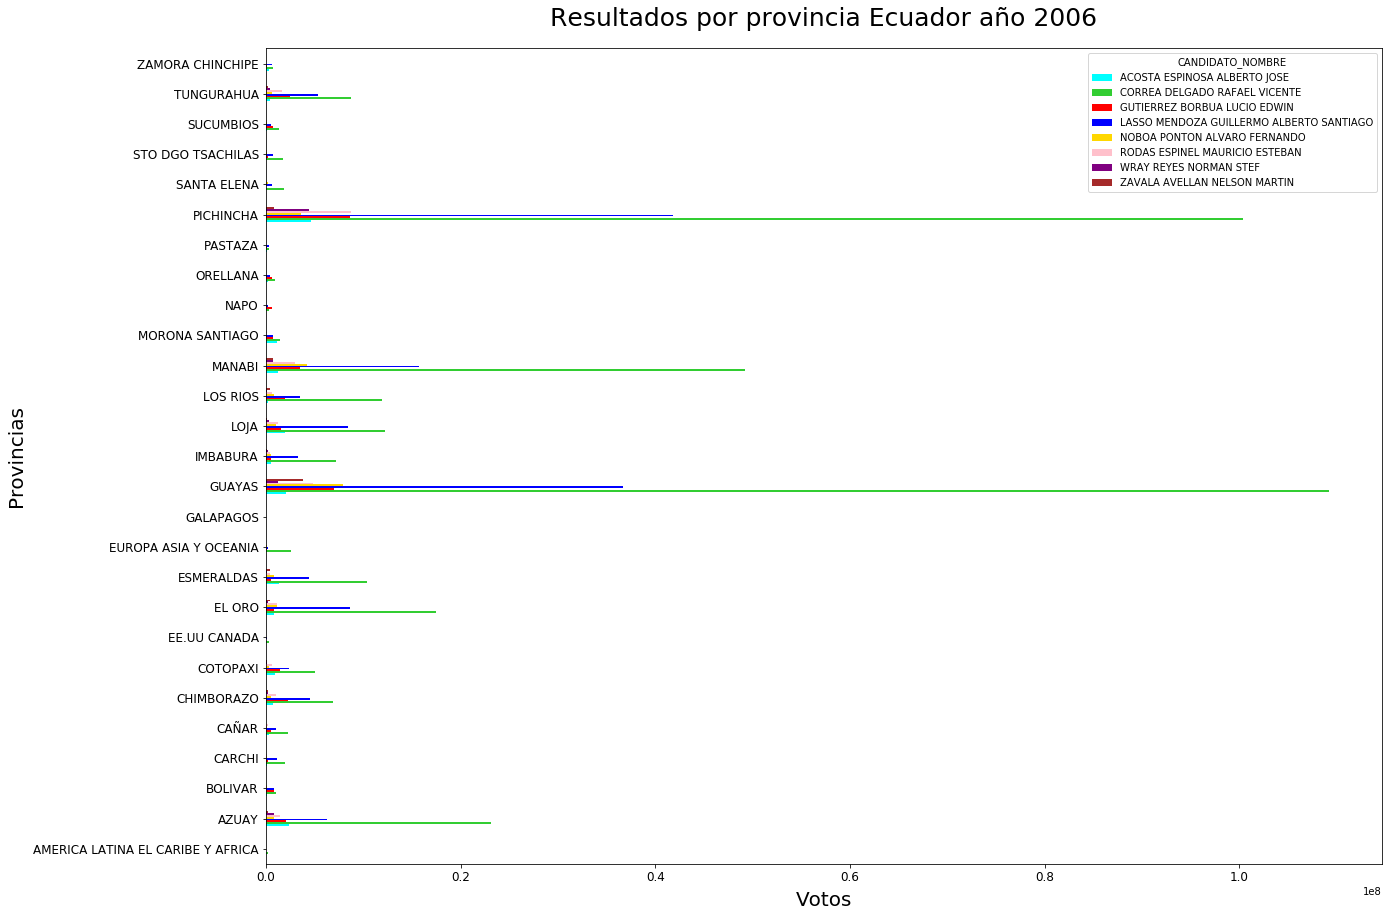

In [25]:
df_prov2.plot(kind='barh', figsize=(20,15), label=None, color=Colores)

plt.xlabel('Votos', fontsize=20, labelpad= 7)
plt.ylabel('Provincias', fontsize=20, labelpad= 7)
plt.title('Resultados por provincia Ecuador año 2006', fontsize=25, y=1.02)
plt.tick_params(labelsize=12)

plt.show()

In [26]:
df_prov1.to_excel('Provinciales 2013.xlsx', sheet_name='Hoja1')
print('Exportación exitosa')

Exportación exitosa


In [27]:
del df_prov1
del df_prov
del df_p

## Agrupando los votos por canton

Nuevamente nos centramos en reunir la información en una sola tabla, esta vez voy a organizar los votos por cantón. Vamos a utilizar la misma tabla unificada, pero esta vez vamos a agrupar la información por cantón y nombre de candidato.

In [29]:
df_cant=df_p2013.drop(['PROVINCIA_CODIGO','PROVINCIA_NOMBRE','PARROQUIA_CODIGO','PARROQUIA_NOMBRE'], axis=1)
df_cant.head()

,CANTON_CODIGO,CANTON_NOMBRE
0,360,ZARUMA
1,440,PORTOVIEJO
2,285,SANTA ISABEL
3,215,ALAUSI
4,620,TENA


In [32]:
df_p=pd.merge(left=df_R2013, right=df_c2013, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_p.head()

,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE
0,1,260,285,33,96,380,9,1000001,185,9.0,1000001.0,NOBOA PONTON ALVARO FERNANDO
1,1,260,285,33,96,380,8,1000006,1098,8.0,1000006.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
2,1,260,285,33,96,380,1,1000007,40,1.0,1000007.0,ZAVALA AVELLAN NELSON MARTIN
3,1,260,285,33,96,380,3,1000002,3963,3.0,1000002.0,CORREA DELGADO RAFAEL VICENTE
4,1,260,285,33,96,380,4,1000005,389,4.0,1000005.0,GUTIERREZ BORBUA LUCIO EDWIN


In [33]:
df_p=pd.merge(left=df_p, right=df_cant, how='left', left_on='CANTON_CODIGO', right_on='CANTON_CODIGO')
df_p.head()

,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE,CANTON_NOMBRE
0,1,260,285,33,96,380,9,1000001,185,9.0,1000001.0,NOBOA PONTON ALVARO FERNANDO,CUENCA
1,1,260,285,33,96,380,9,1000001,185,9.0,1000001.0,NOBOA PONTON ALVARO FERNANDO,CUENCA
2,1,260,285,33,96,380,9,1000001,185,9.0,1000001.0,NOBOA PONTON ALVARO FERNANDO,CUENCA
3,1,260,285,33,96,380,9,1000001,185,9.0,1000001.0,NOBOA PONTON ALVARO FERNANDO,CUENCA
4,1,260,285,33,96,380,9,1000001,185,9.0,1000001.0,NOBOA PONTON ALVARO FERNANDO,CUENCA


In [34]:
df_cant1=df_p.groupby(['CANTON_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_cant1.head(16)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  \
CANTON_NOMBRE      CANDIDATO_NOMBRE                                            
24 DE MAYO         ACOSTA ESPINOSA ALBERTO JOSE                         4284   
                   CORREA DELGADO RAFAEL VICENTE                        4284   
                   GUTIERREZ BORBUA LUCIO EDWIN                         4284   
                   LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO             4284   
                   NOBOA PONTON ALVARO FERNANDO                         4284   
                   RODAS ESPINEL MAURICIO ESTEBAN                       4284   
                   WRAY REYES NORMAN STEF                               4284   
                   ZAVALA AVELLAN NELSON MARTIN                         4284   
A.BAQUERIZO MORENO ACOSTA ESPINOSA ALBERTO JOSE                          593   
                   CORREA DELGADO RAFAEL VICENTE                         593   
                   GUTIERREZ BORBUA LUCIO EDWIN                          593   
                   LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO              593   
                   NOBOA PONTON ALVARO FERNANDO                          593   
                   RODAS ESPINEL MAURICIO ESTEBAN                        593   
                   WRAY REYES NORMAN STEF                                593   
                   ZAVALA AVELLAN NELSON MARTIN                          593   

                                                             VOTOS_NULOS  \
CANTON_NOMBRE      CANDIDATO_NOMBRE                                        
24 DE MAYO         ACOSTA ESPINOSA ALBERTO JOSE                    10152   
                   CORREA DELGADO RAFAEL VICENTE                   10152   
                   GUTIERREZ BORBUA LUCIO EDWIN                    10152   
                   LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO        10152   
                   NOBOA PONTON ALVARO FERNANDO                    10152   
                   RODAS ESPINEL MAURICIO ESTEBAN                  10152   
                   WRAY REYES NORMAN STEF                          10152   
                   ZAVALA AVELLAN NELSON MARTIN                    10152   
A.BAQUERIZO MORENO ACOSTA ESPINOSA ALBERTO JOSE                     1322   
                   CORREA DELGADO RAFAEL VICENTE                    1322   
                   GUTIERREZ BORBUA LUCIO EDWIN                     1322   
                   LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO         1322   
                   NOBOA PONTON ALVARO FERNANDO                     1322   
                   RODAS ESPINEL MAURICIO ESTEBAN                   1322   
                   WRAY REYES NORMAN STEF                           1322   
                   ZAVALA AVELLAN NELSON MARTIN                     1322   

                                                             CANDIDATO_VOTOS  
CANTON_NOMBRE      CANDIDATO_NOMBRE                                           
24 DE MAYO         ACOSTA ESPINOSA ALBERTO JOSE                         1180  
                   CORREA DELGADO RAFAEL VICENTE                       44308  
                   GUTIERREZ BORBUA LUCIO EDWIN                         4528  
                   LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            11736  
                   NOBOA PONTON ALVARO FERNANDO                         3860  
                   RODAS ESPINEL MAURICIO ESTEBAN                       3144  
                   WRAY REYES NORMAN STEF                               1120  
                   ZAVALA AVELLAN NELSON MARTIN                          908  
A.BAQUERIZO MORENO ACOSTA ESPINOSA ALBERTO JOSE                           79  
                   CORREA DELGADO RAFAEL VICENTE                       10116  
                   GUTIERREZ BORBUA LUCIO EDWIN                         1080  
                   LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO             2222  
                   NOBOA PONTON ALVARO FERNANDO                          597  
                   RODAS ESPINEL MAURICIO ESTEBAN                 

In [35]:
df_cant1.to_excel('Cantonales 2013.xlsx', sheet_name='Hoja1')
print('Exportación exitosa')

Exportación exitosa


In [36]:
del df_cant1
del df_cant
del df_p

### Agrupando los votos por parroquia

In [37]:
df_parr=df_p2013.drop(['PROVINCIA_CODIGO','PROVINCIA_NOMBRE','CANTON_CODIGO','CANTON_NOMBRE'], axis=1)
df_parr.head()

,PARROQUIA_CODIGO,PARROQUIA_NOMBRE
0,5,ABANIN
1,10,ABDON CALDERON
2,15,ABDON CALDERON / LA UNION
3,20,ACHUPALLAS
4,25,AHUANO


In [38]:
df_p=pd.merge(left=df_R2013, right=df_c2013, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_p.head()

,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE
0,1,260,285,33,96,380,9,1000001,185,9.0,1000001.0,NOBOA PONTON ALVARO FERNANDO
1,1,260,285,33,96,380,8,1000006,1098,8.0,1000006.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
2,1,260,285,33,96,380,1,1000007,40,1.0,1000007.0,ZAVALA AVELLAN NELSON MARTIN
3,1,260,285,33,96,380,3,1000002,3963,3.0,1000002.0,CORREA DELGADO RAFAEL VICENTE
4,1,260,285,33,96,380,4,1000005,389,4.0,1000005.0,GUTIERREZ BORBUA LUCIO EDWIN


In [39]:
df_p=pd.merge(left=df_p, right=df_parr, how='left', left_on='PARROQUIA_CODIGO', right_on='PARROQUIA_CODIGO')
df_p.head()

,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE,PARROQUIA_NOMBRE
0,1,260,285,33,96,380,9,1000001,185,9.0,1000001.0,NOBOA PONTON ALVARO FERNANDO,BAÑOS
1,1,260,285,33,96,380,8,1000006,1098,8.0,1000006.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,BAÑOS
2,1,260,285,33,96,380,1,1000007,40,1.0,1000007.0,ZAVALA AVELLAN NELSON MARTIN,BAÑOS
3,1,260,285,33,96,380,3,1000002,3963,3.0,1000002.0,CORREA DELGADO RAFAEL VICENTE,BAÑOS
4,1,260,285,33,96,380,4,1000005,389,4.0,1000005.0,GUTIERREZ BORBUA LUCIO EDWIN,BAÑOS


In [40]:
df_parr1=df_p.groupby(['PARROQUIA_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_parr1.head(16)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  \
PARROQUIA_NOMBRE CANDIDATO_NOMBRE                                            
10 DE AGOSTO     ACOSTA ESPINOSA ALBERTO JOSE                          271   
                 CORREA DELGADO RAFAEL VICENTE                         271   
                 GUTIERREZ BORBUA LUCIO EDWIN                          271   
                 LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO              271   
                 NOBOA PONTON ALVARO FERNANDO                          271   
                 RODAS ESPINEL MAURICIO ESTEBAN                        271   
                 WRAY REYES NORMAN STEF                                271   
                 ZAVALA AVELLAN NELSON MARTIN                          271   
10 NOVIEMBRE     ACOSTA ESPINOSA ALBERTO JOSE                           23   
                 CORREA DELGADO RAFAEL VICENTE                          23   
                 GUTIERREZ BORBUA LUCIO EDWIN                           23   
                 LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO               23   
                 NOBOA PONTON ALVARO FERNANDO                           23   
                 RODAS ESPINEL MAURICIO ESTEBAN                         23   
                 WRAY REYES NORMAN STEF                                 23   
                 ZAVALA AVELLAN NELSON MARTIN                           23   

                                                           VOTOS_NULOS  \
PARROQUIA_NOMBRE CANDIDATO_NOMBRE                                        
10 DE AGOSTO     ACOSTA ESPINOSA ALBERTO JOSE                      498   
                 CORREA DELGADO RAFAEL VICENTE                     498   
                 GUTIERREZ BORBUA LUCIO EDWIN                      498   
                 LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO          498   
                 NOBOA PONTON ALVARO FERNANDO                      498   
                 RODAS ESPINEL MAURICIO ESTEBAN                    498   
                 WRAY REYES NORMAN STEF                            498   
                 ZAVALA AVELLAN NELSON MARTIN                      498   
10 NOVIEMBRE     ACOSTA ESPINOSA ALBERTO JOSE                       58   
                 CORREA DELGADO RAFAEL VICENTE                      58   
                 GUTIERREZ BORBUA LUCIO EDWIN                       58   
                 LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO           58   
                 NOBOA PONTON ALVARO FERNANDO                       58   
                 RODAS ESPINEL MAURICIO ESTEBAN                     58   
                 WRAY REYES NORMAN STEF                             58   
                 ZAVALA AVELLAN NELSON MARTIN                       58   

                                                           CANDIDATO_VOTOS  
PARROQUIA_NOMBRE CANDIDATO_NOMBRE                                           
10 DE AGOSTO     ACOSTA ESPINOSA ALBERTO JOSE                          190  
                 CORREA DELGADO RAFAEL VICENTE                        1660  
                 GUTIERREZ BORBUA LUCIO EDWIN                          280  
                 LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO              563  
                 NOBOA PONTON ALVARO FERNANDO                          143  
                 RODAS ESPINEL MAURICIO ESTEBAN                         62  
                 WRAY REYES NORMAN STEF                                 26  
                 ZAVALA AVELLAN NELSON MARTIN                           38  
10 NOVIEMBRE     ACOSTA ESPINOSA ALBERTO JOSE                            6  
                 CORREA DELGADO RAFAEL VICENTE                         477  
                 GUTIERREZ BORBUA LUCIO EDWIN                           79  
                 LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO               62  
                 NOBOA PONTON ALVARO FERNANDO                           33  
                 RODAS ESPINEL MAURICIO ESTEBAN                         20  
                 WRAY REYES NORMAN STEF                                  5  
            

In [41]:
df_parr1.to_excel('Parroquiales 2013.xlsx', sheet_name='Hoja1')
print('Exportación exitosa')

Exportación exitosa


In [42]:
del df_parr1
del df_p